# Well Stratigraphic Forward Modeling

This notebook shows how to use pyWellSFM to simulate the deposits along a well.

### Import modules and load data

In [ ]:
import os
import sys

root_path = os.path.dirname(os.getcwd())
package_path = os.path.join(root_path, "src")
if package_path not in sys.path:
    sys.path.append(package_path)

import matplotlib.pyplot as plt

from pywellsfm import (
    FSSimulatorRunner,
    FSSimulatorRunnerData,
)
from pywellsfm.io import loadSimulationData


# Load the simulation data from the JSON file
simulation_filepath = os.path.join(root_path, "tests/data/simulation.json")
simulationData: FSSimulatorRunnerData = loadSimulationData(simulation_filepath)

print("Loaded simulation data:")
print(f"Scenario name: {simulationData.scenario.name}")
print(f"Number of realizations: {len(simulationData.realizationDataList)}")
print(f"Well names: {[rd.well.name for rd in simulationData.realizationDataList]}")

Interpolation method set to 'linear' by default
Loaded simulation data:
Scenario name: Scenario1
Number of realizations: 2
Well names: ['Well1', 'Well2']


### Create the simulator runner with default parameters and run the simulation


In [4]:
simulator = FSSimulatorRunner(
    simulationData.scenario,
    simulationData.realizationDataList,
    max_bathymetry_change_per_step=0.5,
    dt_min=0.001,
    dt_max=0.1,
    safety=0.9,
    max_steps=int(1e9)
)

simulator.prepare()
simulator.run()
simulator.finalize()

Running time step at age 30.0000 over 10.0000 Myr...
Running time step at age 29.9518 over 10.0000 Myr...
Running time step at age 29.8618 over 10.0000 Myr...
Running time step at age 29.7718 over 10.0000 Myr...
Running time step at age 29.6818 over 10.0000 Myr...
Running time step at age 29.5918 over 10.0000 Myr...
Running time step at age 29.5018 over 10.0000 Myr...
Running time step at age 29.4118 over 10.0000 Myr...
Running time step at age 29.3218 over 10.0000 Myr...
Running time step at age 29.2318 over 10.0000 Myr...
Running time step at age 29.1418 over 10.0000 Myr...
Running time step at age 29.0518 over 10.0000 Myr...
Running time step at age 28.9618 over 10.0000 Myr...
Running time step at age 28.8718 over 10.0000 Myr...
Running time step at age 28.7818 over 10.0000 Myr...
Running time step at age 28.6918 over 10.0000 Myr...
Running time step at age 28.6018 over 10.0000 Myr...
Running time step at age 28.5118 over 10.0000 Myr...
Running time step at age 28.4218 over 10.0000 

### Plot results

Well 1

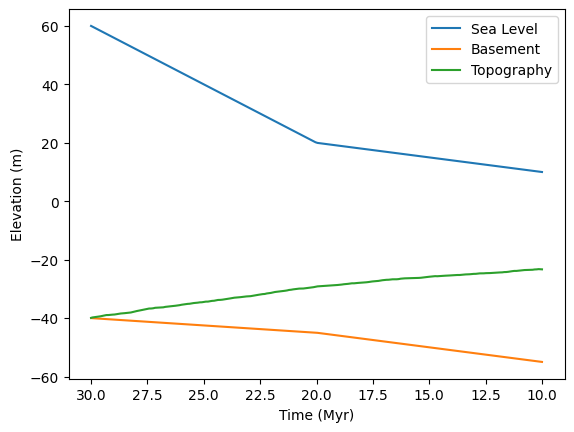

In [ ]:
ds = simulator.outputs
assert ds is not None, "Simulator outputs should not be None after finalization."

i = 0  # realization index
t = ds["time"].values
sea = ds["sea_level"].values
base = ds["basement"].isel(realization=i).values
topo = base + ds["thickness_cumul"].isel(realization=i).values

plt.figure()
plt.plot(t, sea, label="Sea Level")
plt.plot(t, base, label="Basement")
plt.plot(t, topo, label="Topography")

plt.gca().invert_xaxis()  # reverse x-axis to show time going from past to present
plt.xlabel("Time (Myr)")
plt.ylabel("Elevation (m)")
plt.legend()
plt.show()

Well 2

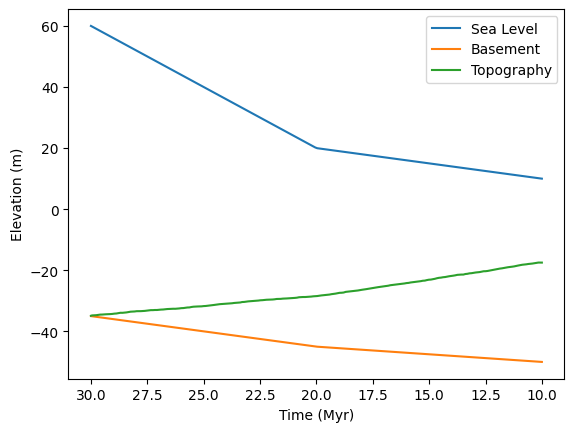

In [6]:
ds = simulator.outputs
assert ds is not None, "Simulator outputs should not be None after finalization."

i = 1  # realization index
t = ds["time"].values
sea = ds["sea_level"].values
base = ds["basement"].isel(realization=i).values
topo = base + ds["thickness_cumul"].isel(realization=i).values

plt.figure()
plt.plot(t, sea, label="Sea Level")
plt.plot(t, base, label="Basement")
plt.plot(t, topo, label="Topography")

plt.gca().invert_xaxis()  # reverse x-axis to show time going from past to present
plt.xlabel("Time (Myr)")
plt.ylabel("Elevation (m)")
plt.legend()
plt.show()